In [74]:
from excercise8.gridworld.GridEnvironment import GridEnvironment
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [75]:
env = GridEnvironment()
q_table = np.random.uniform(low=-1, high=1, size=([7, 7, 4]))
print(q_table.shape)

lr = 0.1
gamma = 1
epsilon = 0.2

(7, 7, 4)


100%|██████████| 999/999 [00:00<00:00, 5313.86it/s]


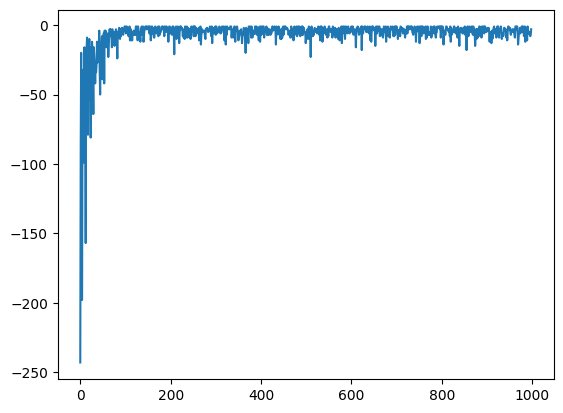

In [76]:
scores = []

for i in tqdm.tqdm(range(1, 1000)):
    state = env.reset()
    
    total_reward = 0  # Renamed from reward for clarity
    
    done = False
    while not done:
        action = np.argmax(q_table[tuple(state)])
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, 4)

        next_state, reward, done = env.step(action)

        # End the episode if the next state is the goal position
        done = next_state == env.goal_position

        old_val = q_table[tuple(state + [action])]
        
        
        error = reward + gamma * np.max(q_table[tuple(next_state)]) - old_val
        
        
        new_val = old_val + lr * error
        q_table[tuple(state + [action])] = new_val

        state = next_state
        total_reward += reward

    scores.append(total_reward)

plt.plot(scores)
plt.show()

In [77]:
env.render(q_table)